In [1]:
#import necessary libraies
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:


data = pd.read_csv('customer.csv')

In [3]:
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["RowNumber"] = le.fit_transform(data["RowNumber"])
data["CustomerId"] = le.fit_transform(data["CustomerId"])
data["Surname"] = le.fit_transform(data["Surname"])
data["CreditScore"] = le.fit_transform(data["CreditScore"])
data["Geography"] = le.fit_transform(data["Geography"])
data["Gender"] = le.fit_transform(data["Gender"])
data["Age"] = le.fit_transform(data["Age"])
data["Tenure"] = le.fit_transform(data["Tenure"])
data["Balance"] = le.fit_transform(data["Balance"])
data["NumOfProducts"] = le.fit_transform(data["NumOfProducts"])
data["HasCrCard"] = le.fit_transform(data["HasCrCard"])
data["IsActiveMember"] = le.fit_transform(data["IsActiveMember"])
data["EstimatedSalary"] = le.fit_transform(data["EstimatedSalary"])
data["Exited"] = le.fit_transform(data["Exited"])


In [8]:
data.head()

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          0        2736     1115          228          0       0   24   
1          1        3258     1177          217          2       0   23   
2          2        2104     2040          111          0       0   24   
3          3        5435      289          308          0       0   21   
4          4        6899     1822          459          2       0   25   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       2        0              0          1               1             5068   
1       1      743              0          0               1             5639   
2       8     5793              2          1               0             5707   
3       1        0              1          0               0             4704   
4       2     3696              0          1               1             3925   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [9]:
x= data.iloc[:,0:14].values

In [10]:
x

array([[   0, 2736, 1115, ...,    1, 5068,    1],
       [   1, 3258, 1177, ...,    1, 5639,    0],
       [   2, 2104, 2040, ...,    0, 5707,    1],
       ...,
       [9997,  717, 1570, ...,    1, 2062,    1],
       [9998, 4656, 2345, ...,    0, 4639,    1],
       [9999, 2497, 2751, ...,    0, 1878,    0]], dtype=int64)

In [11]:
y= data.iloc[:,13:14].values

In [12]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [13]:
x[:,9:10]

array([[0],
       [0],
       [2],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [14]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
a= one.fit_transform(x[:,6:7]).toarray()
b= one.fit_transform(x[:,7:8]).toarray()
c= one.fit_transform(x[:,8:9]).toarray()
d= one.fit_transform(x[:,9:10]).toarray()
e= one.fit_transform(x[:,10:11]).toarray()
f= one.fit_transform(x[:,11:12]).toarray()
g= one.fit_transform(x[:,12:13]).toarray()
h= one.fit_transform(x[:,13:14]).toarray()
# i= one.fit_transform(x[:,14:15]).toarray()
# j= one.fit_transform(x[:,15:16]).toarray()
x=np.delete(x,[6,7,8,9,10,11,12,13],axis=1)
x=np.concatenate((a,b,c,d,e,f,g,h),axis=1)

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
 #smt = SMOTE()
 #x_resample, y_resample = smt.fit_resample(x,y)
 #x_resample

In [17]:
#y_resample

In [18]:
#x.shape, x_resample.shape

In [19]:
#y.shape, y_resample.shape

In [20]:
data.describe()

RowNumber   CustomerId       Surname   CreditScore     Geography  \
count  10000.00000  10000.00000  10000.000000  10000.000000  10000.000000   
mean    4999.50000   4999.50000   1507.774200    259.584600      0.746300   
std     2886.89568   2886.89568    846.204311     96.496107      0.827529   
min        0.00000      0.00000      0.000000      0.000000      0.000000   
25%     2499.75000   2499.75000    773.750000    193.000000      0.000000   
50%     4999.50000   4999.50000   1542.000000    261.000000      0.000000   
75%     7499.25000   7499.25000   2238.250000    327.000000      1.000000   
max     9999.00000   9999.00000   2931.000000    459.000000      2.000000   

             Gender           Age        Tenure       Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean       0.545700     20.920600      5.012800   2036.788100       0.530200   
std        0.497932     10.482065      2.892174   2125.232536       0.581654   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000     14.000000      3.000000      0.000000       0.000000   
50%        1.000000     19.000000      5.000000   1383.500000       0.000000   
75%        1.000000     26.000000      7.000000   3882.250000       1.000000   
max        1.000000     69.000000     10.000000   6381.000000       3.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100      4998.621200      0.203700  
std        0.45584        0.499797      2886.711202      0.402769  
min        0.00000        0.000000         0.000000      0.000000  
25%        0.00000        0.000000      2498.750000      0.000000  
50%        1.00000        1.000000      4998.500000      0.000000  
75%        1.00000        1.000000      7498.250000      0.000000  
max        1.00000        1.000000      9998.000000      1.000000

C:\Users\GASCCS23\AppData\Local\Temp\ipykernel_10236\3174349086.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Tenure"])
C:\Users\GASCCS23\AppData\Local\Temp\ipykernel_10236\3174349086.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["EstimatedSalary"])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

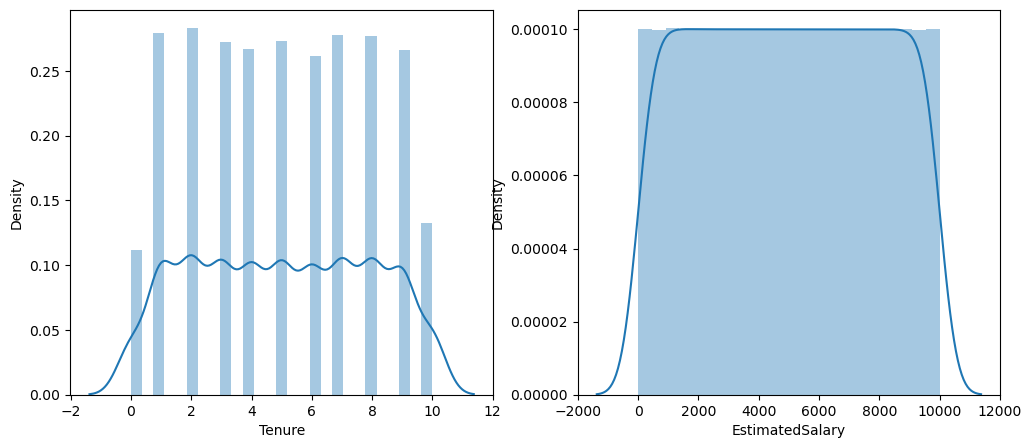

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data["Tenure"])
plt.subplot(1,2,2)
sns.distplot(data["EstimatedSalary"])

<Axes: ylabel='count'>

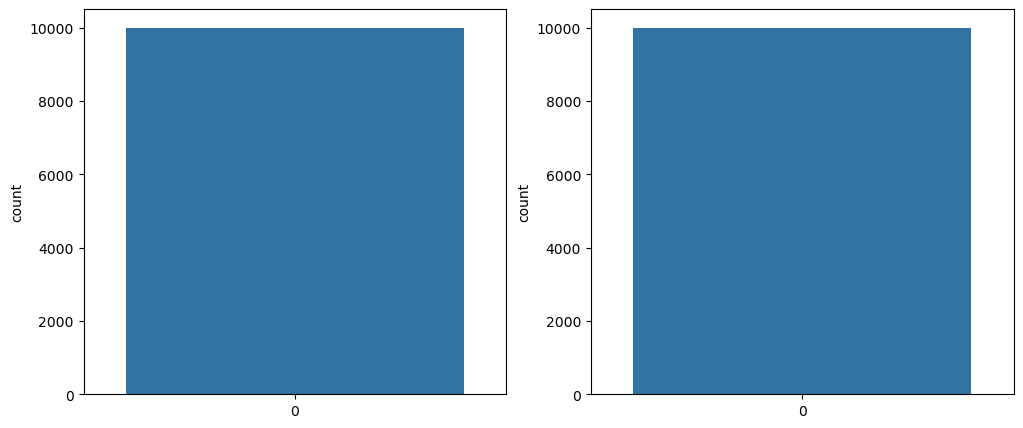

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data["CustomerId"])
plt.subplot(1,2,2)
sns.countplot(data["IsActiveMember"])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

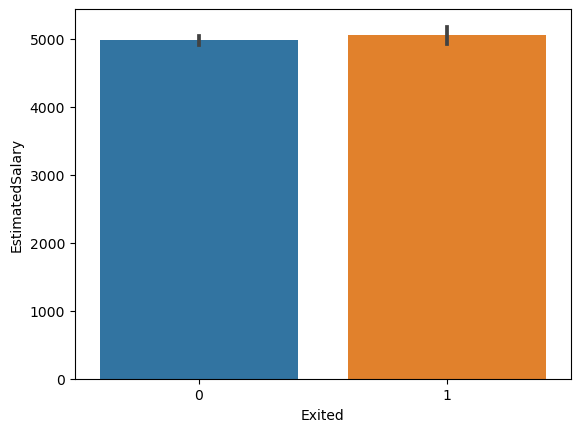

In [23]:
sns.barplot(x="Exited", y="EstimatedSalary",data=data)

<Axes: >

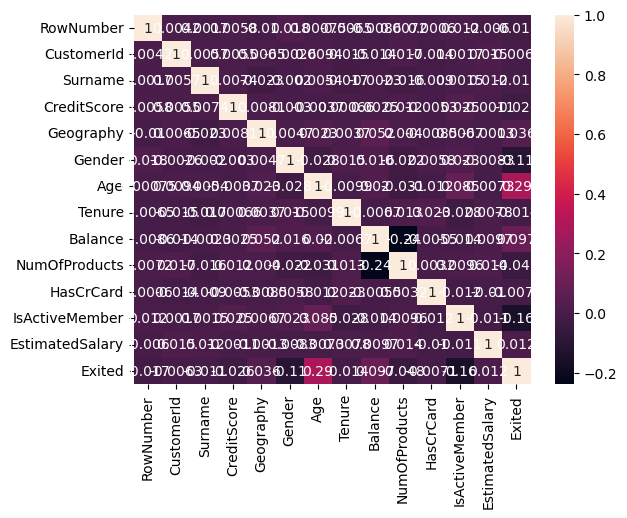

In [24]:
sns.heatmap(data.corr(), annot=True)

C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `

C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue`

C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue`

C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue`

C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\GASCCS23\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


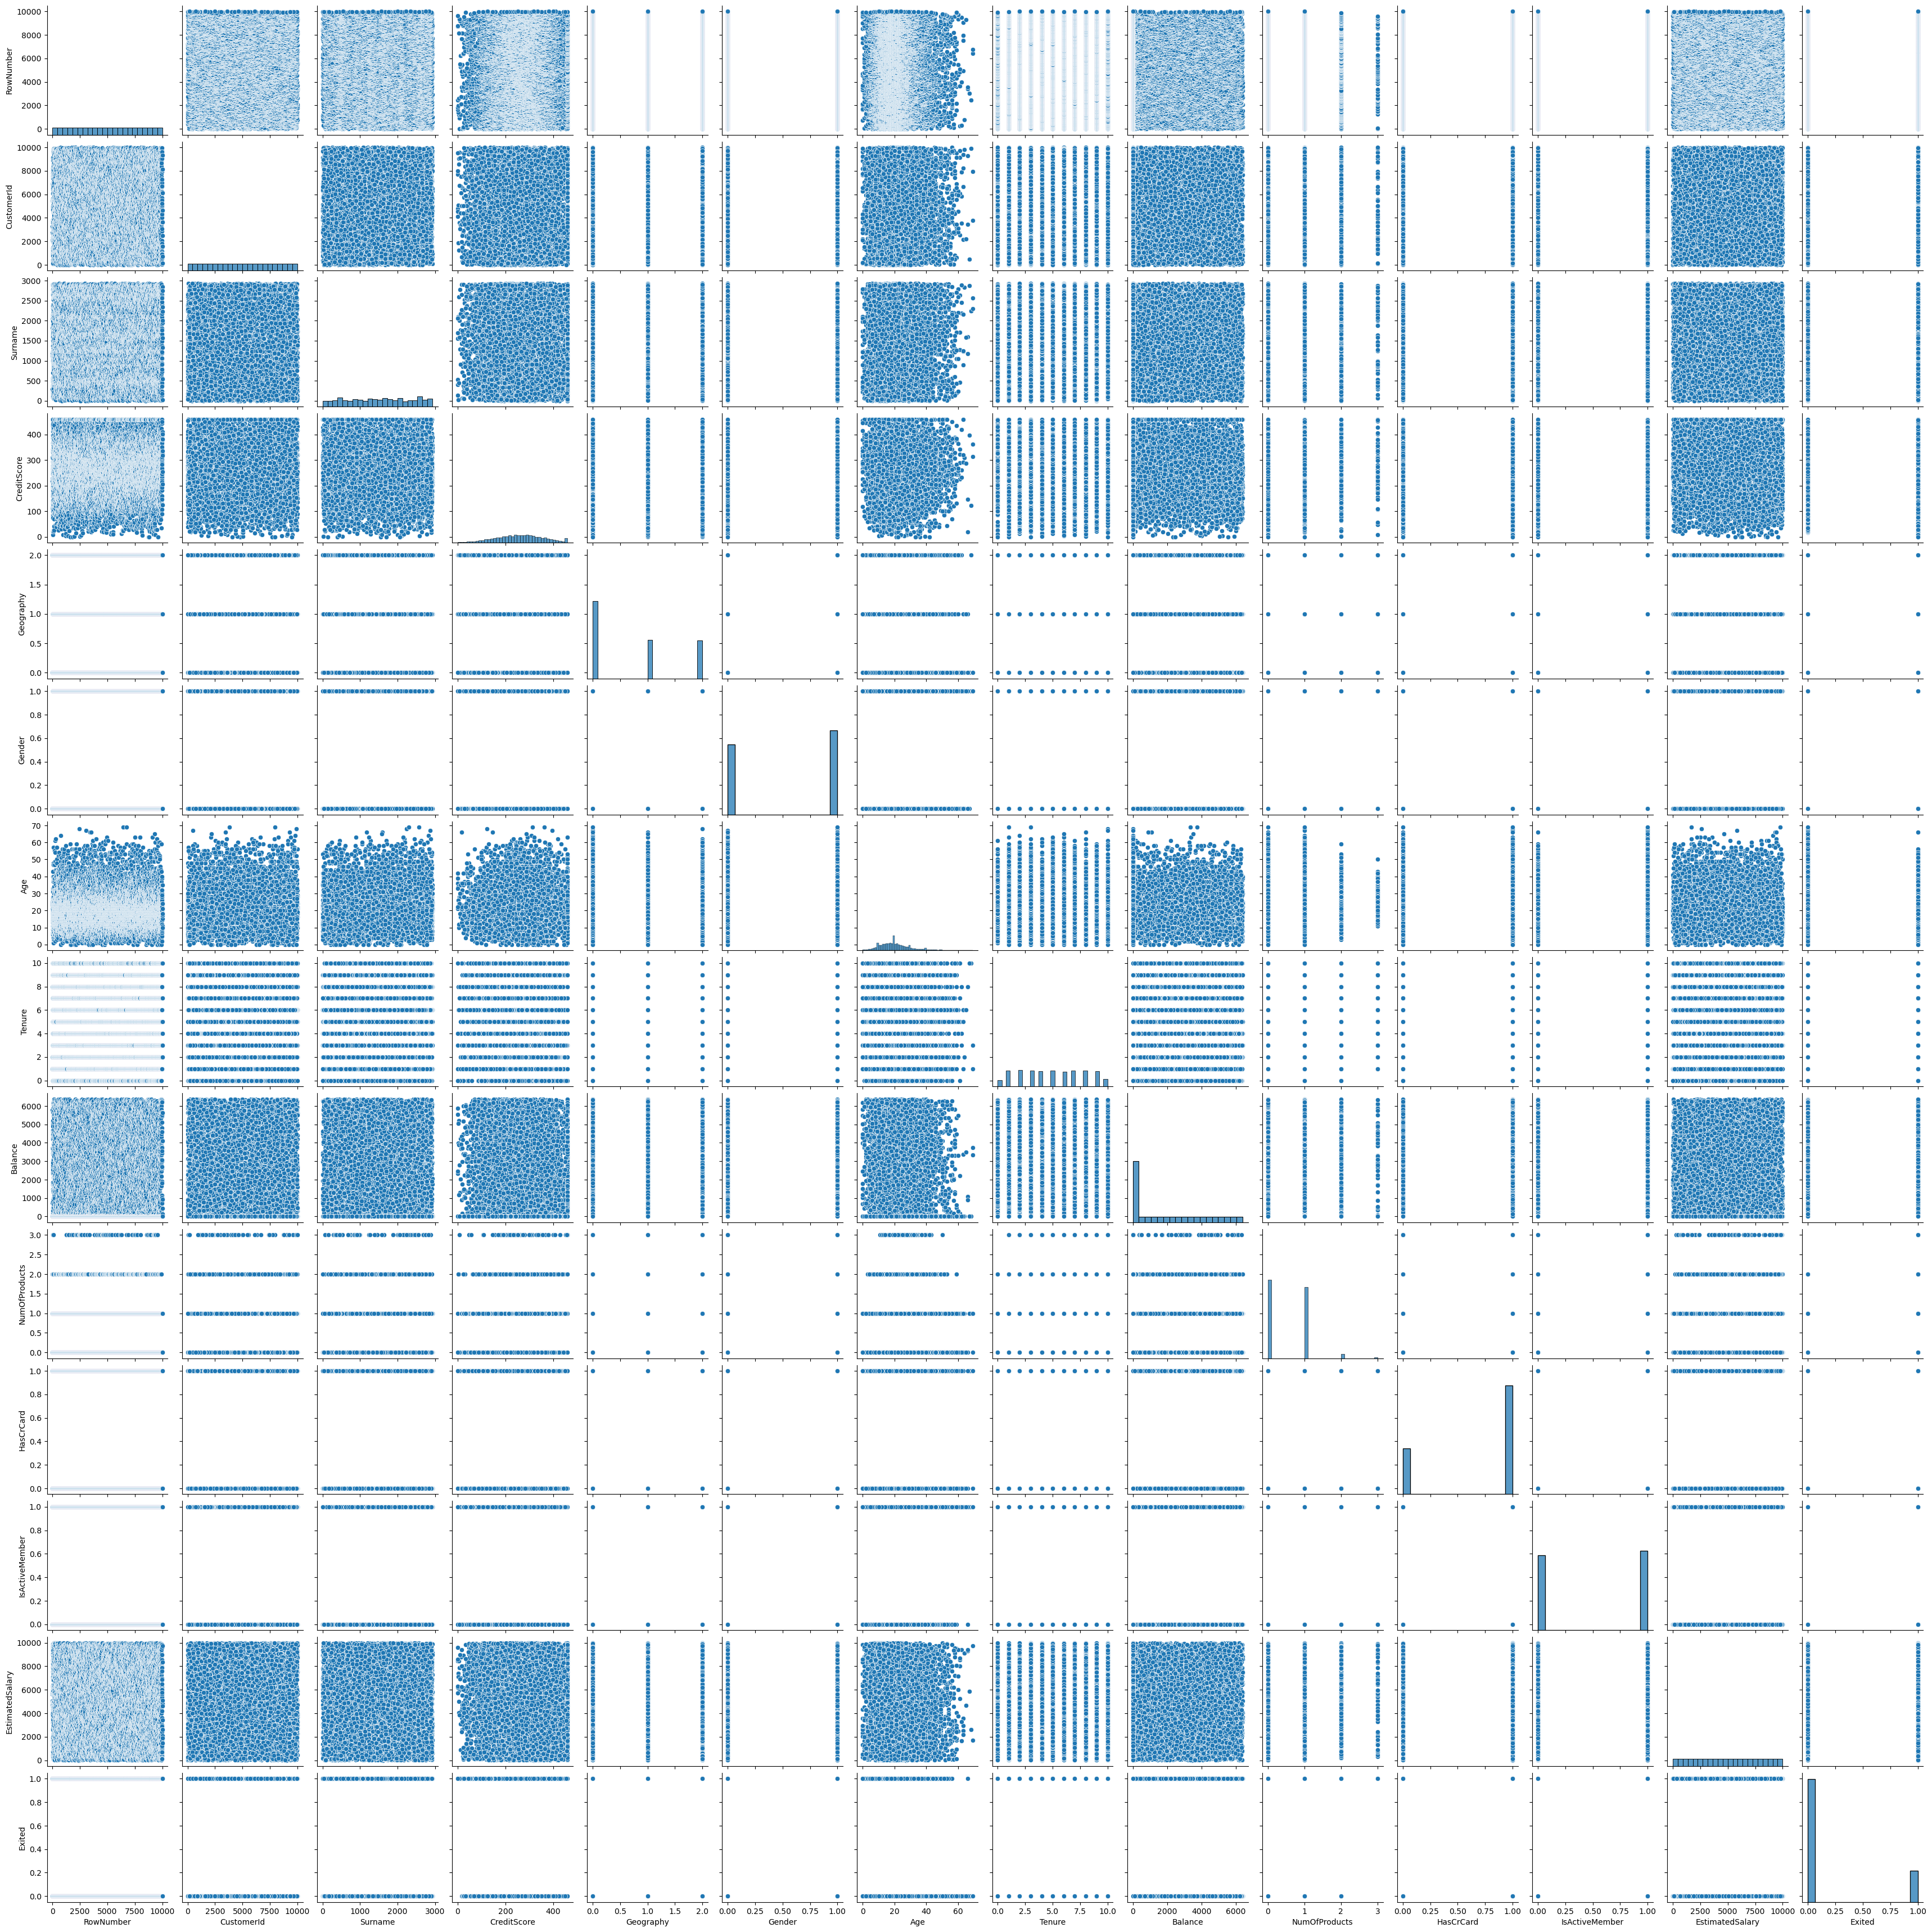

In [25]:
sns.pairplot(data=data, markers=["^","v"],palette="Row number")

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0) 

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [31]:
x_train.shape

(8000, 16472)

In [32]:
#importing and building the Decision tree model
def logreg(x_train,x_test,y_train,y_test):
    lr = LogisticRegression(random_state=0)
    lr.fit(x_train,y_train)
    y_lr_tr = lr.predict(x_train)
    print(accuracy_score(y_lr_tr,y_train))
    yPred_lr = lr.predict(x_test)
    print(accuracy_score(yPred_lr,y_test))
    print("***Logistic Regression***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_lr))
    print("Classification Report")
    print(classification_report(y_test,yPred_lr))


In [33]:
#printing the train accuracy and test accuracy respectively
logreg(x_train,x_test,y_train,y_test)

C:\Users\GASCCS23\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0
0.998
***Logistic Regression***
Confusion_Matrix
[[1595    0]
 [   4  401]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      0.99      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [34]:
#importing and building the Decision tree model
def decisionTree(x_train, x_test, y_train,y_test):
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
    dtc.fit(x_train,y_train)
    y_dt_tr = dtc.predict(x_train)
    print(accuracy_score(y_dt_tr,y_train))
    yPred_dt = dtc.predict(x_test)
    print(accuracy_score(yPred_dt,y_test))
    print("***Decision Tree***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_dt))
    print("Classification Report")
    print(classification_report(y_test,yPred_dt))
    

In [35]:
#printing the train accuracy and test accuracy respectively
decisionTree(x_train,x_test,y_train,y_test)

1.0
1.0
***Decision Tree***
Confusion_Matrix
[[1595    0]
 [   0  405]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [36]:
#importing and building the random forest model
def RandomForest(x_train,x_test,y_train,y_test):
    rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
    rf.fit(x_train,y_train)
    y_rf_tr = rf.predict(x_train)
    print(accuracy_score(y_rf_tr,y_train))
    yPred_rf = rf.predict(x_test)
    print(accuracy_score(yPred_rf,y_test))
    print("***Random Forest***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_rf))
    print("Classification Report")
    print(classification_report(y_test,yPred_rf))
    

In [37]:
#printing the train accuracy and test accuracy respectively
RandomForest(x_train,x_test,y_train,y_test)

C:\Users\GASCCS23\AppData\Local\Temp\ipykernel_10236\1310605395.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


1.0
1.0
***Random Forest***
Confusion_Matrix
[[1595    0]
 [   0  405]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [38]:
#importing and building the KNN model
def KNN(x_train,x_test,y_train,y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_knn_tr = knn.predict(x_train)
    print(accuracy_score(y_knn_tr,y_train))
    yPred_knn = knn.predict(x_test)
    print(accuracy_score(yPred_knn,y_test))
    print("***KNN***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_knn))
    print("Classification Report")
    print(classification_report(y_test,yPred_knn))

In [39]:
#printing the train accuracy and test accuracy respectively
KNN(x_train,x_test,y_train,y_test)

C:\Users\GASCCS23\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.908375
0.8925
***KNN***
Confusion_Matrix
[[1588    7]
 [ 208  197]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1595
           1       0.97      0.49      0.65       405

    accuracy                           0.89      2000
   macro avg       0.92      0.74      0.79      2000
weighted avg       0.90      0.89      0.88      2000



In [53]:
 #importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [54]:
 #Initialising the ANN
classifier = Sequential()

In [55]:
 #adding the input layer and the first hidden layer
classifier.add(Dense(units=30, activation='relu',input_dim=16472))

In [56]:
 #adding the second hidden layer
classifier.add(Dense(units=30, activation='relu'))

In [57]:
 #adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [63]:
 #comiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


In [64]:
#filling the ANN to the Traning set
model_history = classifier.fit(x_train,y_train, batch_size=10, validation_split=0.33, epochs=200)

Epoch 1/200
536/536 [==============================] - 18s 28ms/step - loss: 0.4252 - accuracy: 0.8029 - val_loss: 0.3783 - val_accuracy: 0.8875
Epoch 2/200
536/536 [==============================] - 5s 9ms/step - loss: 0.2488 - accuracy: 0.9207 - val_loss: 0.4577 - val_accuracy: 0.7012
Epoch 3/200
536/536 [==============================] - 5s 9ms/step - loss: 0.0345 - accuracy: 0.9882 - val_loss: 0.4691 - val_accuracy: 0.7035
Epoch 4/200
536/536 [==============================] - 5s 10ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.4579 - val_accuracy: 0.7232
Epoch 5/200
536/536 [==============================] - 5s 10ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.4280 - val_accuracy: 0.7527
Epoch 6/200
536/536 [==============================] - 5s 10ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.4732 - val_accuracy: 0.7225
Epoch 7/200
536/536 [==============================] - 5s 10ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.4503 - val_accuracy: 

536/536 [==============================] - 5s 9ms/step - loss: 3.2040e-09 - accuracy: 1.0000 - val_loss: 0.1195 - val_accuracy: 0.9610
Epoch 57/200
536/536 [==============================] - 5s 9ms/step - loss: 2.9271e-09 - accuracy: 1.0000 - val_loss: 0.1235 - val_accuracy: 0.9599
Epoch 58/200
536/536 [==============================] - 5s 10ms/step - loss: 2.6655e-09 - accuracy: 1.0000 - val_loss: 0.1258 - val_accuracy: 0.9599
Epoch 59/200
536/536 [==============================] - 5s 10ms/step - loss: 2.5124e-09 - accuracy: 1.0000 - val_loss: 0.1291 - val_accuracy: 0.9591
Epoch 60/200
536/536 [==============================] - 5s 10ms/step - loss: 2.3568e-09 - accuracy: 1.0000 - val_loss: 0.1313 - val_accuracy: 0.9580
Epoch 61/200
536/536 [==============================] - 5s 10ms/step - loss: 2.1885e-09 - accuracy: 1.0000 - val_loss: 0.1344 - val_accuracy: 0.9576
Epoch 62/200
536/536 [==============================] - 5s 10ms/step - loss: 2.0769e-09 - accuracy: 1.0000 - val_loss: 0.

536/536 [==============================] - 5s 9ms/step - loss: 1.2141e-09 - accuracy: 1.0000 - val_loss: 0.1855 - val_accuracy: 0.9455
Epoch 112/200
536/536 [==============================] - 5s 9ms/step - loss: 1.2219e-09 - accuracy: 1.0000 - val_loss: 0.1862 - val_accuracy: 0.9455
Epoch 113/200
536/536 [==============================] - 5s 9ms/step - loss: 1.2277e-09 - accuracy: 1.0000 - val_loss: 0.1868 - val_accuracy: 0.9455
Epoch 114/200
536/536 [==============================] - 5s 9ms/step - loss: 1.2356e-09 - accuracy: 1.0000 - val_loss: 0.1874 - val_accuracy: 0.9455
Epoch 115/200
536/536 [==============================] - 5s 9ms/step - loss: 1.2391e-09 - accuracy: 1.0000 - val_loss: 0.1881 - val_accuracy: 0.9455
Epoch 116/200
536/536 [==============================] - 5s 9ms/step - loss: 1.2467e-09 - accuracy: 1.0000 - val_loss: 0.1887 - val_accuracy: 0.9455
Epoch 117/200
536/536 [==============================] - 5s 9ms/step - loss: 1.2524e-09 - accuracy: 1.0000 - val_loss: 0

Epoch 166/200
536/536 [==============================] - 5s 9ms/step - loss: 1.0983e-09 - accuracy: 1.0000 - val_loss: 0.2057 - val_accuracy: 0.9436
Epoch 167/200
536/536 [==============================] - 5s 10ms/step - loss: 1.1010e-09 - accuracy: 1.0000 - val_loss: 0.2061 - val_accuracy: 0.9432
Epoch 168/200
536/536 [==============================] - 5s 10ms/step - loss: 1.1049e-09 - accuracy: 1.0000 - val_loss: 0.2064 - val_accuracy: 0.9432
Epoch 169/200
536/536 [==============================] - 5s 10ms/step - loss: 1.1086e-09 - accuracy: 1.0000 - val_loss: 0.2068 - val_accuracy: 0.9432
Epoch 170/200
536/536 [==============================] - 5s 9ms/step - loss: 1.1122e-09 - accuracy: 1.0000 - val_loss: 0.2071 - val_accuracy: 0.9432
Epoch 171/200
536/536 [==============================] - 5s 10ms/step - loss: 1.1150e-09 - accuracy: 1.0000 - val_loss: 0.2074 - val_accuracy: 0.9428
Epoch 172/200
536/536 [==============================] - 5s 9ms/step - loss: 1.1179e-09 - accuracy: 1.

In [119]:
classifier.save("telecom_churn.h5")

In [65]:
ann_pred = classifier.predict(x_test)
ann_pred = (ann_pred>0.5)
ann_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [66]:
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))

0.9525
***ANN Model***
Confusion_Matrix
[[1595    0]
 [  95  310]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1595
           1       1.00      0.77      0.87       405

    accuracy                           0.95      2000
   macro avg       0.97      0.88      0.92      2000
weighted avg       0.96      0.95      0.95      2000



In [81]:
#testing on random input values
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
print("Pedicting on random input")
lr_pred_own = lr.predict(x_test[0].reshape(-1,16472))
print("output list: ",lr_pred_own)

C:\Users\GASCCS23\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pedicting on random input
output list:  [0]


In [83]:
#printing on random input values
dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(x_train,y_train)
print("predicting on random input")
dtc_pred_own = dtc.predict(x_test[0].reshape(-1,16472))
print("output is: ",dtc_pred_own)

predicting on random input
output is:  [0]


In [89]:
#testing on random input values
rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
rf.fit(x_train,y_train)
print("Predicting on random input")
rf_pred_own = rf.predict(x_test[0].reshape(-1,16472))
print("output is: ",rf_pred_own)

C:\Users\GASCCS23\AppData\Local\Temp\ipykernel_10236\336959594.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Predicting on random input
output is:  [0]


In [95]:
#tesing on random input values
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Predicting on random input")
knn_pred_own= knn.predict(x_test[0].reshape(-1,16472))
print("output is: ",knn_pred_own)

C:\Users\GASCCS23\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Predicting on random input
output is:  [0]


In [97]:
#tesing on random input values
print("predicting on random input")
ann_pred_own = classifier.predict(x_test[0].reshape(-1,16472))
print(ann_pred_own)
ann_pred_own = (ann_pred_own,5)
print("output is: ",ann_pred_own)


predicting on random input
1/1 [==============================] - 0s 22ms/step
[[3.568568e-13]]
output is:  (array([[3.568568e-13]], dtype=float32), 5)


In [101]:
def compareModel(X_train,X_test,y_train,y_test):
    logreg(x_train,x_test,y_train,y_test)
    print('_'*100)
    decisionTree(X_train,x_test,y_train,y_test)
    print('_'*100)
    RandomForest(X_train,x_test,y_train,y_test)
    print('_'*100)
    KNN(X_train,x_test,y_train,y_test)
    print('_'*100)

In [102]:
compareModel(x_train,x_test,y_train,y_test)

C:\Users\GASCCS23\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0
0.998
***Logistic Regression***
Confusion_Matrix
[[1595    0]
 [   4  401]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      0.99      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

____________________________________________________________________________________________________
1.0
1.0
***Decision Tree***
Confusion_Matrix
[[1595    0]
 [   0  405]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

_________________________________________________

C:\Users\GASCCS23\AppData\Local\Temp\ipykernel_10236\1310605395.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


1.0
1.0
***Random Forest***
Confusion_Matrix
[[1595    0]
 [   0  405]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

____________________________________________________________________________________________________


C:\Users\GASCCS23\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.908375
0.8925
***KNN***
Confusion_Matrix
[[1588    7]
 [ 208  197]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1595
           1       0.97      0.49      0.65       405

    accuracy                           0.89      2000
   macro avg       0.92      0.74      0.79      2000
weighted avg       0.90      0.89      0.88      2000

____________________________________________________________________________________________________


In [107]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))

0.9525
***ANN Model***
Confusion_Matrix
[[1595    0]
 [  95  310]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1595
           1       1.00      0.77      0.87       405

    accuracy                           0.95      2000
   macro avg       0.97      0.88      0.92      2000
weighted avg       0.96      0.95      0.95      2000



In [111]:
y_rf = rf.predict(x_train)
print(accuracy_score(y_rf,y_train))
ypred_rfcv = rf.predict(x_test)
print(accuracy_score(ypred_rfcv,y_test))
print("***Random Forest after Hyperparameter Luning***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ypred_rfcv))
print("Classification Report")
print(classification_report(y_test,ypred_rfcv))
print("Predicting on random input")
rfcv_pred_own = rf.predict(x_test[0].reshape(-1,16472))
print("output is: ",rfcv_pred_own)




1.0
1.0
***Random Forest after Hyperparameter Luning***
Confusion_Matrix
[[1595    0]
 [   0  405]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Predicting on random input
output is:  [0]


In [ ]:
from flask import Flask, render_template,request
import keras
from keras.models import load_model
app = Flask(__name__)
model = load_model("telecom_churn.h5")
@app.route('/') # rendering the html templates
def home():
    return render_template('home.html')
@app.route('/')
def helloworld():
    return render_template("base.html")
@app.route('/assessment')
def prediction():
    return render_template("index.html")
@app.route('/predict',methods = ['POST'])
def admin():
    a= request.form["gender"]
    if (a == 'f'):
        a=0
    if (a == 'm'):   
        a=1
    b= request.form["srcitizen"]
    if (b == 'n'):
        b=0
    if (b == 'y'):
        b=1
    c=request.form["partner"] 
    if (c == 'n'):
        c=0
    if (c == 'y'):  
        c=1
    d=request.form["dependents"]
    if (d == 'n'):
        d=0
    if (d == 'y'):  
        d=1
    e= request.form["tenure"] 
    f= request.form["phservices"]
    if (f == 'n'):
        f=0
    if (f == 'y'):  
        f=1
    g= request.form["multi"] 
    if (g == 'n'):
        g1,g2,g3=1,0,0
    if (g == 'nps'):
        g1,g2,g3=0,1,0
    if  (g == 'y'):
        g1,g2,g3=0,0,1
    h= request.form["is"]
    if (h == 'ds1'):
        h1,h2,h3=1,0,0
    if (h == 'fo'):
        h1,h2,h3=0,1,0
    if (h == 'n'):
        h1,h2,h3=0,0,1
    i= request.form["os"]
    if (i == 'n'):
        i1,i2,i3=1,0,0
    if (i == 'nis'):
        i1,i2,i3=0,1,0
    if (i == 'y'):
        i1,i2,i3=0,0,1
    j= request.form["ob"]
    if (j == 'n'):
        j1,j2,j3=1,0,0
    if (j == 'nis'):
        j1,j2,j3=0,1,0
    if (j == 'y'):
        j1,j2,j3=0,0,1
    k= request.form["dp"]
    if (k == 'n'):
        k1,k2,k3=1,0,0
    if (k == 'nis'):
        k1,k2,k3=0,1,0
    if (k == 'y'):
        k1,k2,k3=0,0,1
    l= request.form["ts"]
    if (l == 'n'):
        l1,l2,l3=1,0,0 
    if (l == 'nis'):
        g1,g2,g3=0,1,0
    if (l == 'y'):
        g1,g2,g3=0,0,1
    if  (g == 'y'):
        g1,g2,g3=0,0,1
    m= request.form["stv"]
    if (m == 'n'):
        m1,m2,m3=1,0,0
    if (m == 'nis'):
        m1,m2,m3=0,1,0
    if (m == 'y'):
        m1,m2,m3=0,0,1
    n= request.form["smv"]
    if (n == 'n'):
        n1,n2,n3=1,0,0
    if (n == 'nis'):
        n1,n2,n3=0,1,0
    if (n == 'y'):
        n1,n2,n3=0,0,1
       
    o= request.form["contract"] 
    if (o == 'mtm'):
        o1,o2,o3=1,0,0
    if (o == 'oyr'):
        o1,o2,o3=0,1,0
    if  (o == 'tyrs'):
        o1,o2,o3=0,0,1
    p= request.form["pmt"]
    if (p == 'ec'):
        p1,p2,p3,p4=1,0,0,0
    if (p == 'mail'):
        p1,p2,p3,p4=0,1,0,0
    if (p == 'bt'):
        p1,p2,p3,p4=0,0,1,0
    if (p == 'cc'):
        p1,p2,p3,p4=0,0,0,1
    q= request.form["plb"]
    if (q == 'n'):
        q=0
    if (q == 'y'):
        q=1
    r= request.form["mcharges"]
    s= request.form["tcharges"]
    t=[[int(g1),int(g2),int(g3),int(h1),int(h2),int(h3),int(i1),int(i2),int(i3),int(j1),int(j2),int(j3)]]
    print(t)
    x= model.predict(t)
    print(x[0])
    if (x[[0]])<=0.5:
        y="No"
        return render_template("predno.html",z=y)
    if (x[[0]])>=0.5:
        y="yes"
        return render_template("predyes.html",z=y)
if __name__=="__main__":
    app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
[2023-04-22 07:45:30,436] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\GASCCS23\anaconda3\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GASCCS23\anaconda3\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GASCCS23\anaconda3\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GASCCS23\anaconda3\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\Users\GASCCS23\AppData\Local\Temp\ipykernel_10236\3080584927.py", line 8, in home
    return render_template('home.html')
  File "C:\Users\GASCCS23\anaconda3\lib\site-packages\flask\templating.py", line 146, in render_template
    template =